# Data Visualizations
### THis notebook contains exploratory data visualizations. Please view the other notebook to see our machine learning models

In [ ]:
import pandas as pd
import seaborn as sb
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Read the dataset

df = pd.read_csv("phiusiil+phishing+url+dataset.zip", compression="zip")
df.info()
df.head()

In [2]:
# Data preprocessing
label_encoder = LabelEncoder()
df['TLD'] = label_encoder.fit_transform(df['TLD'])
df.isnull()
df.duplicated()
df = df.dropna()
df = df.drop_duplicates()

label
Legitimate    134850
Phishing      100945
Name: count, dtype: int64


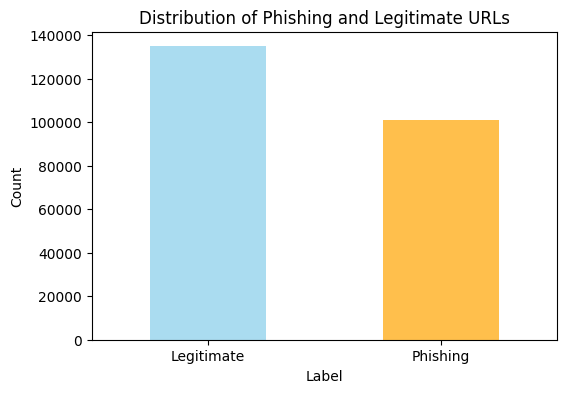

In [3]:
# Plot distribution
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

label_counts = df['label'].replace({0: "Phishing", 1: "Legitimate"}).value_counts()
print(label_counts)
plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar', color=['skyblue', 'orange'], alpha=0.7)
plt.title('Distribution of Phishing and Legitimate URLs')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

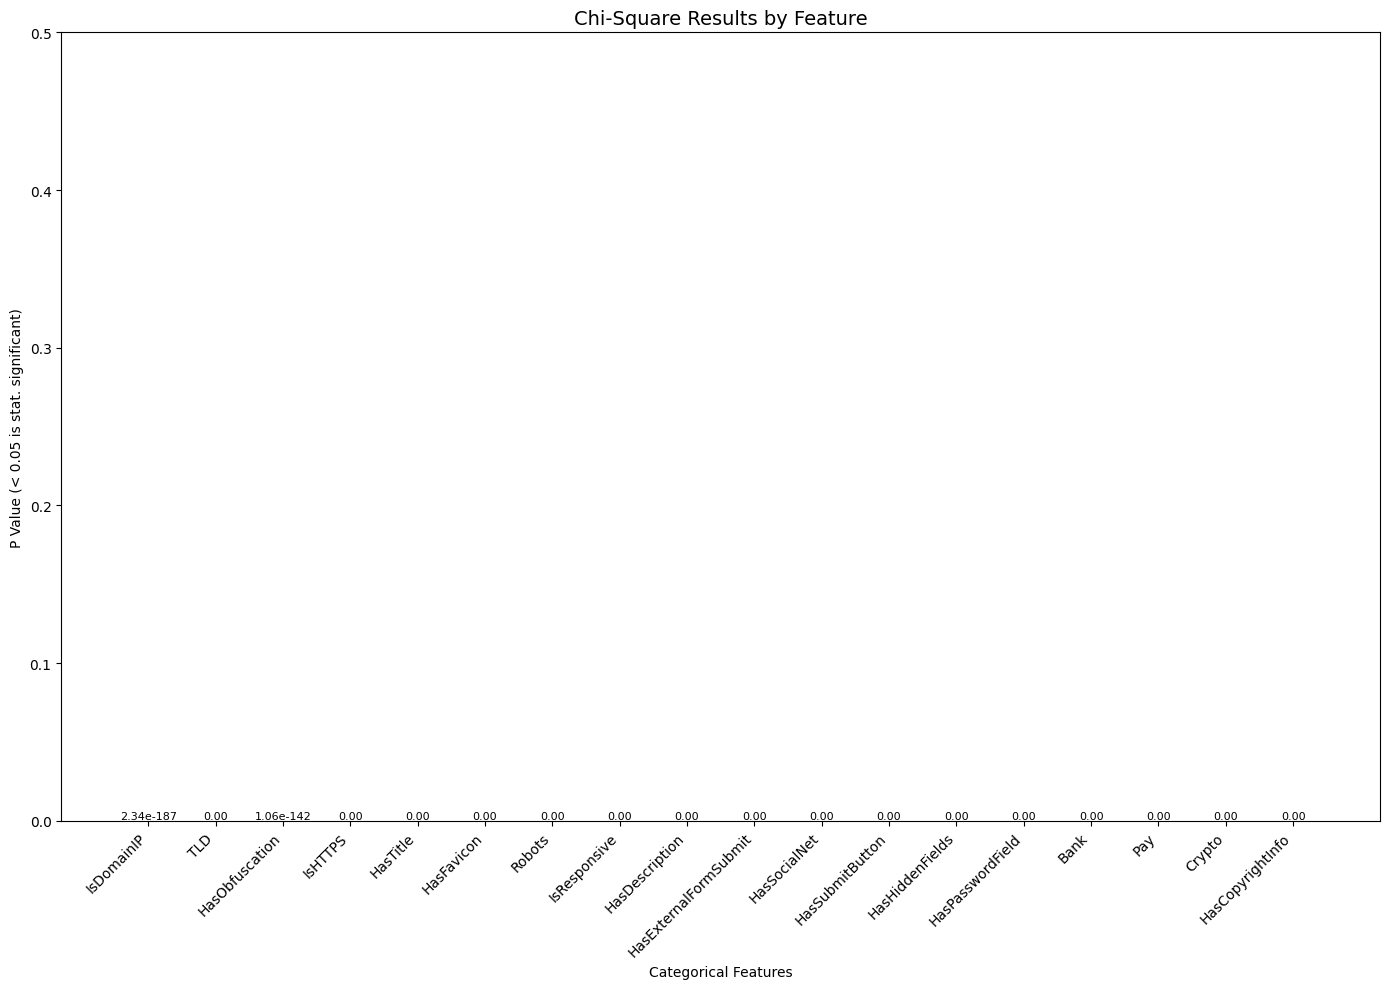

In [4]:
# Chi Square Tests for Each Feature
from scipy.stats import chi2_contingency
results = {}
categorical_features = ['IsDomainIP', 'TLD', 'HasObfuscation', 'IsHTTPS', 'HasTitle', 'HasFavicon', 'Robots', 'IsResponsive', 'HasDescription', 'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo']
for feature in categorical_features:
    # Create contingency table
    contingency_table = pd.crosstab(df[feature], df['label'])
    
    # Perform chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    actual_frequency = np.sum(df[feature] == 1)
    # Store results
    results[feature] = {
        'chi2': chi2,
        'p': p,
        'dof': dof,
        'expected_frequency': expected,
        'actual_frequency': actual_frequency
    }

chi2_chart_values = [results[feature]['p'] for feature in categorical_features]

# Create a bar chart
plt.figure(figsize=(14, 10))
plt.ylim(0, 0.5)
bars = plt.bar(categorical_features, chi2_chart_values)
plt.xlabel('Categorical Features')
plt.ylabel('P Value (< 0.05 is stat. significant)')
plt.title('Chi-Square Results by Feature', fontsize=14)
plt.xticks(rotation=45, ha='right')

for bar, p_value in zip(bars, chi2_chart_values):
    annotaion_text = f"{p_value:.2e}" if p_value != 0 else '0.00'
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), annotaion_text, ha='center', va='bottom', fontsize=8)
    
plt.tight_layout()
plt.show()






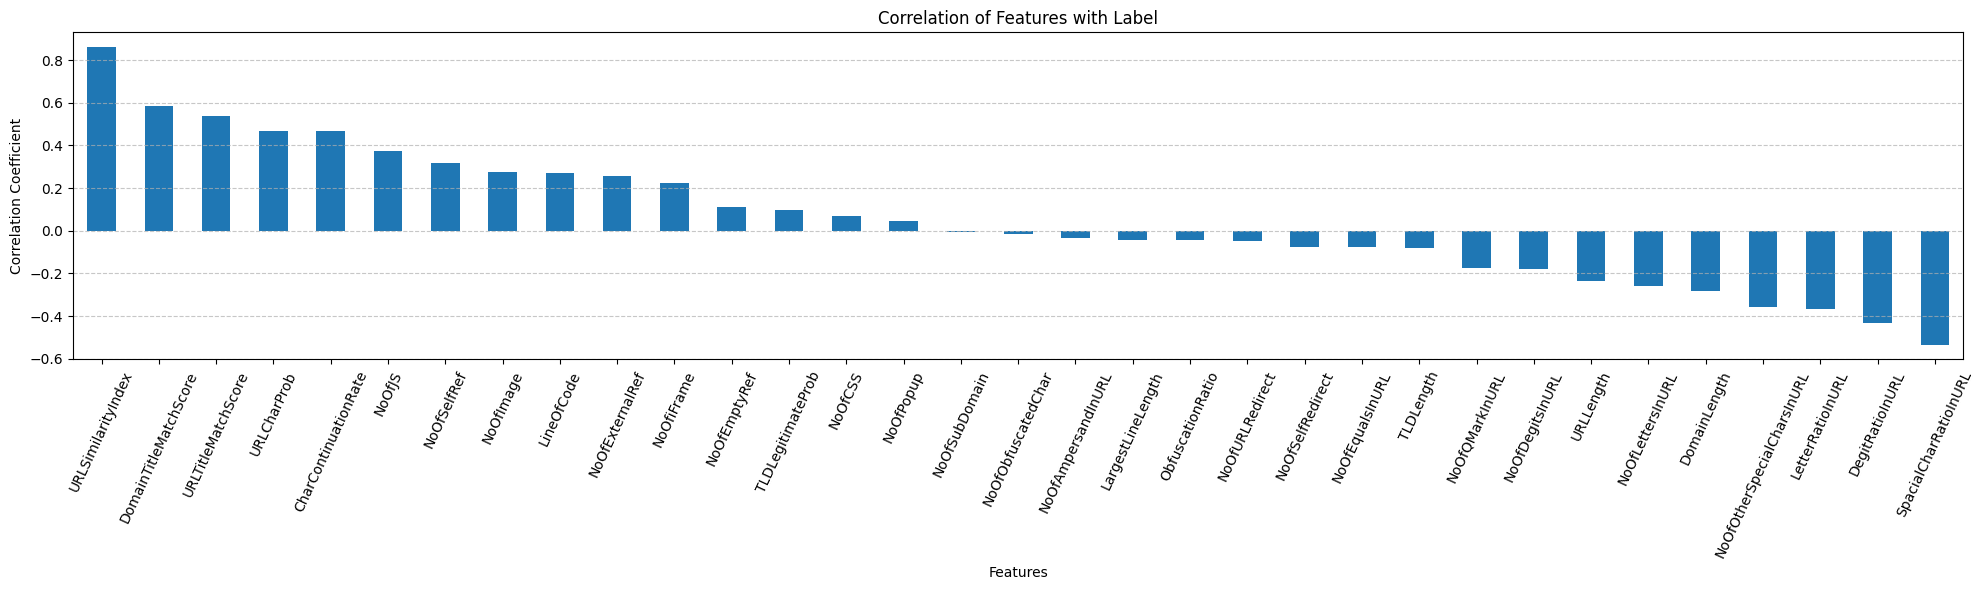

In [5]:
# Calculate correlations for non-categorical features
df2 = df.drop(columns=['FILENAME', 'URL', 'Domain', 'Title', *categorical_features])
correlations = df2.corr()['label'].drop('label')

# Plot correlations
plt.figure(figsize=(20, 6))
correlations.sort_values(ascending=False).plot(kind='bar')
plt.title('Correlation of Features with Label')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=65)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

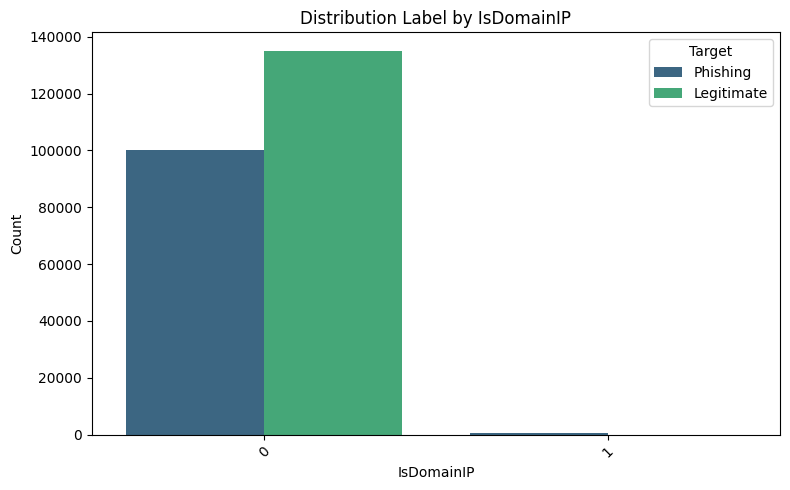

<Figure size 640x480 with 0 Axes>

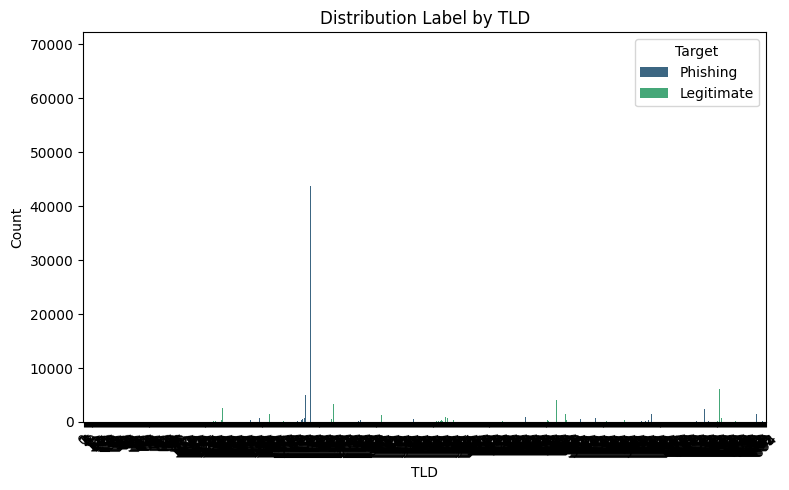

<Figure size 640x480 with 0 Axes>

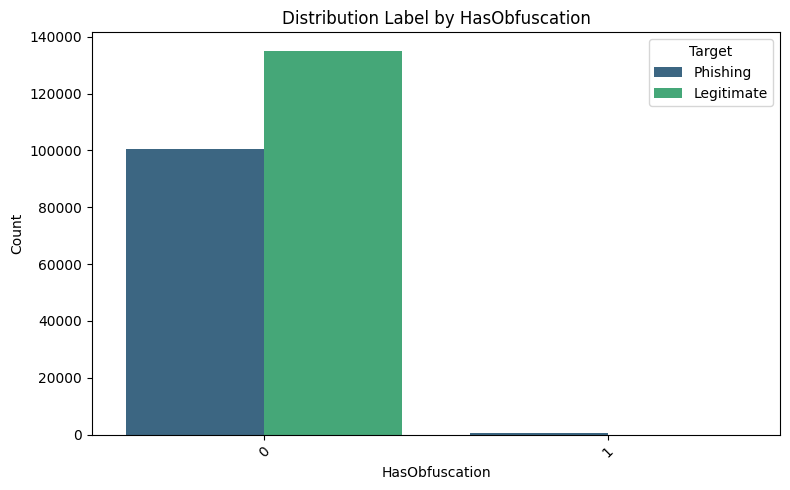

<Figure size 640x480 with 0 Axes>

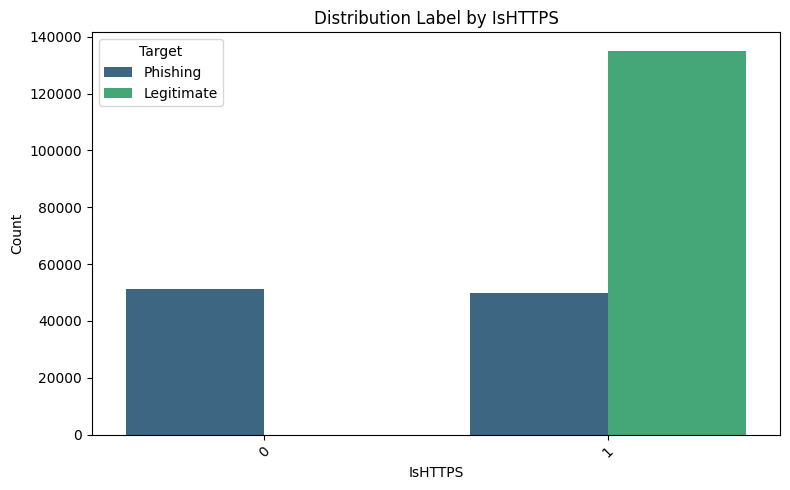

<Figure size 640x480 with 0 Axes>

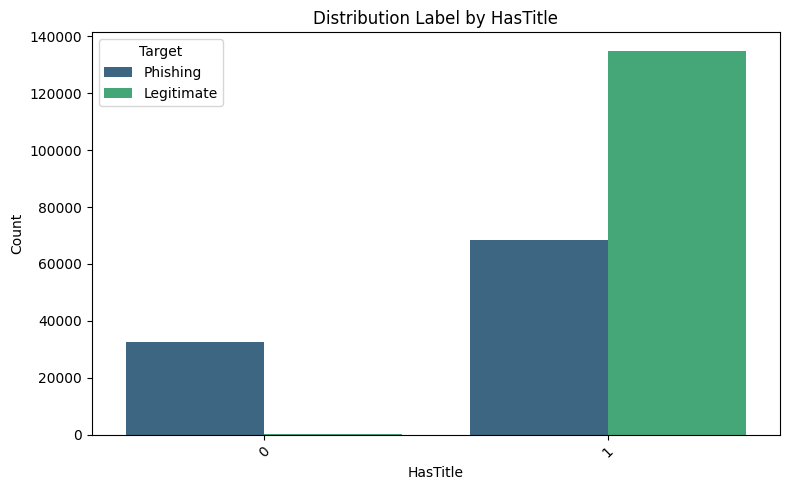

<Figure size 640x480 with 0 Axes>

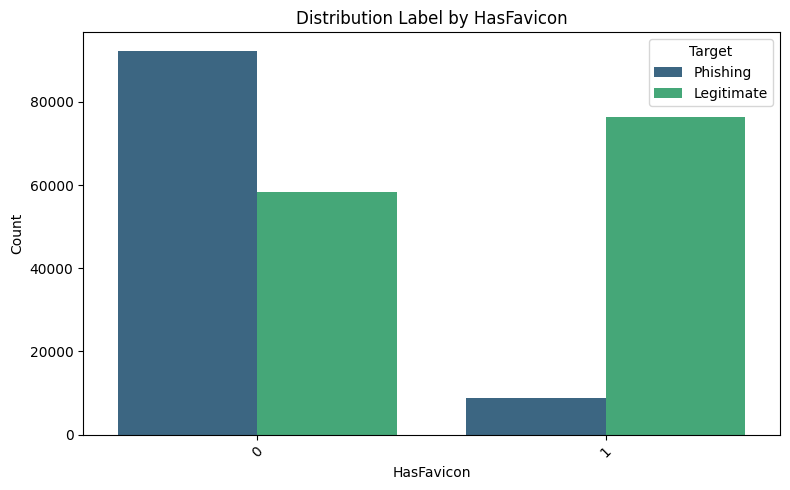

<Figure size 640x480 with 0 Axes>

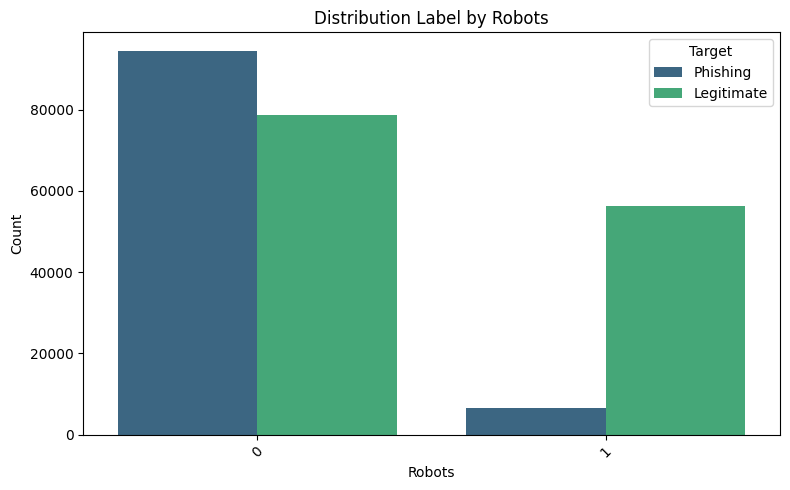

<Figure size 640x480 with 0 Axes>

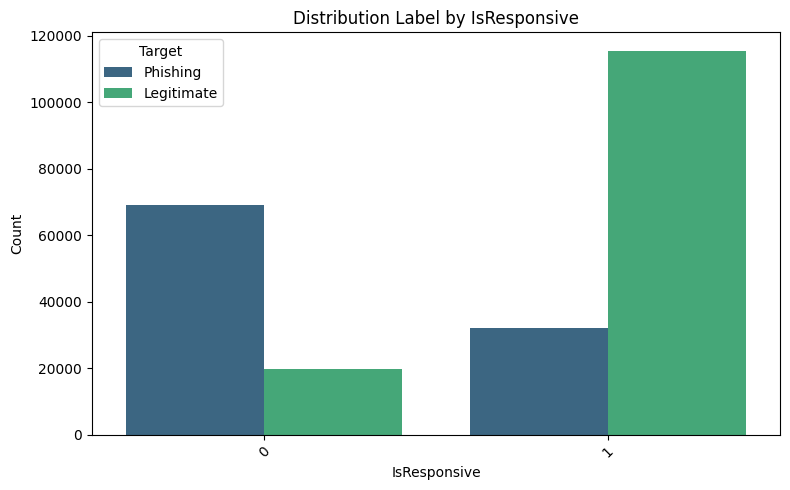

<Figure size 640x480 with 0 Axes>

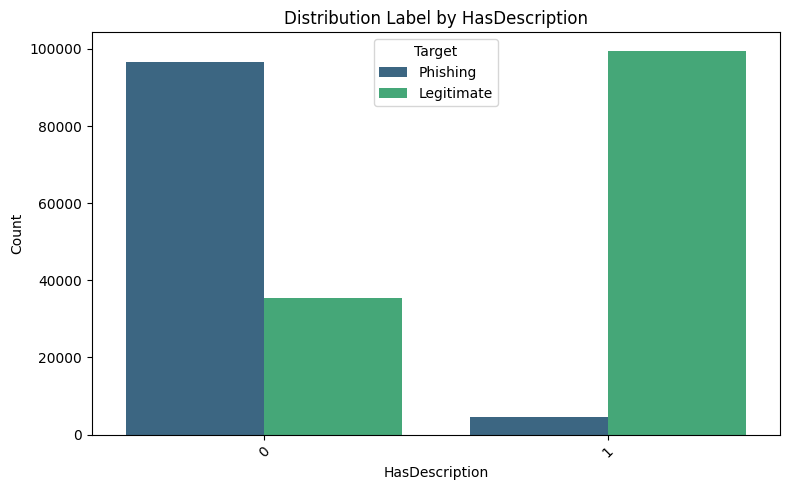

<Figure size 640x480 with 0 Axes>

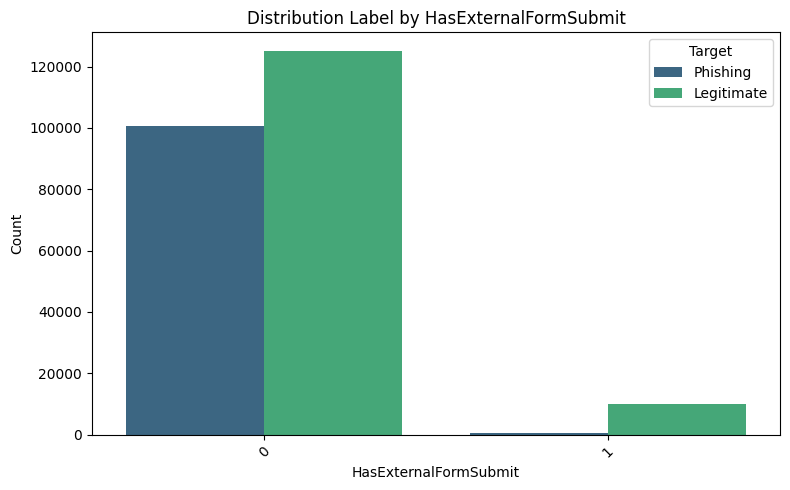

<Figure size 640x480 with 0 Axes>

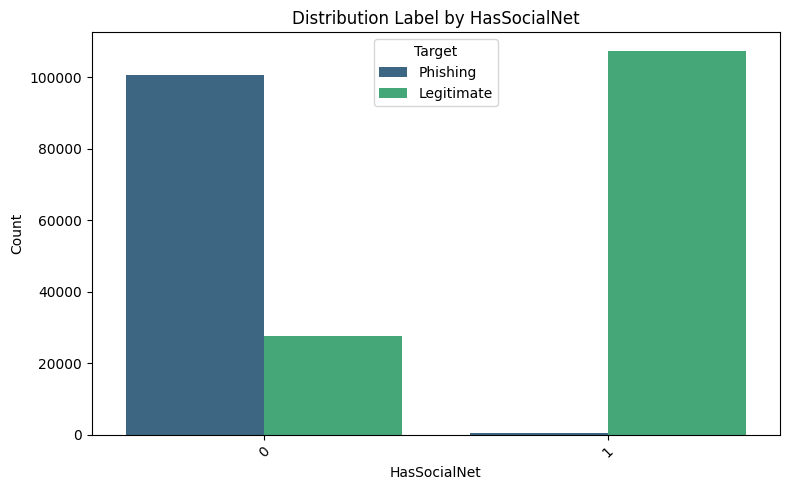

<Figure size 640x480 with 0 Axes>

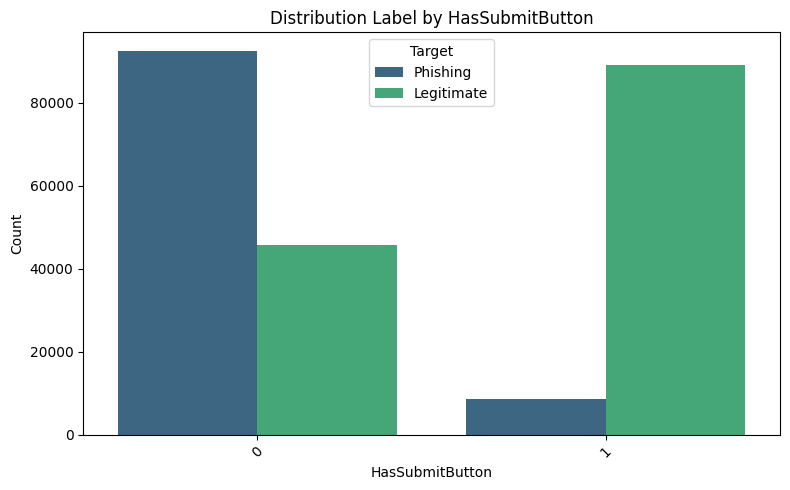

<Figure size 640x480 with 0 Axes>

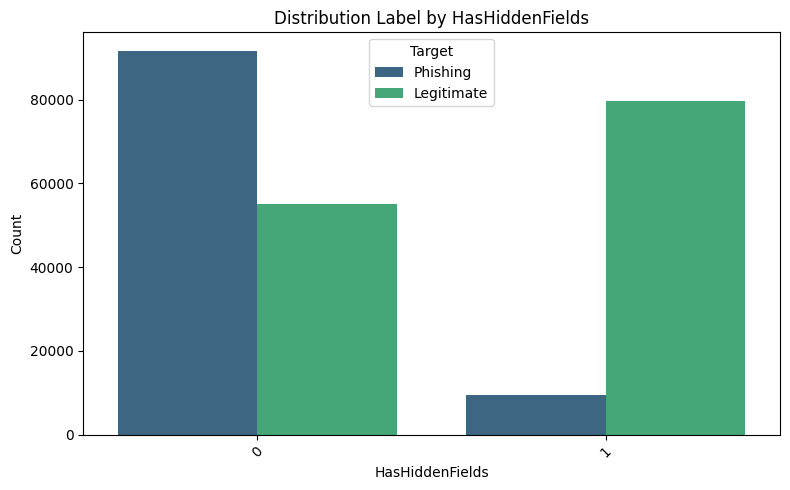

<Figure size 640x480 with 0 Axes>

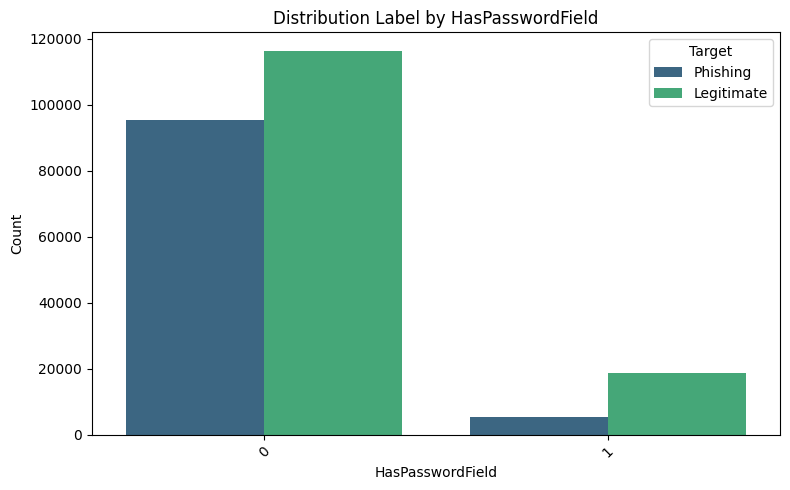

<Figure size 640x480 with 0 Axes>

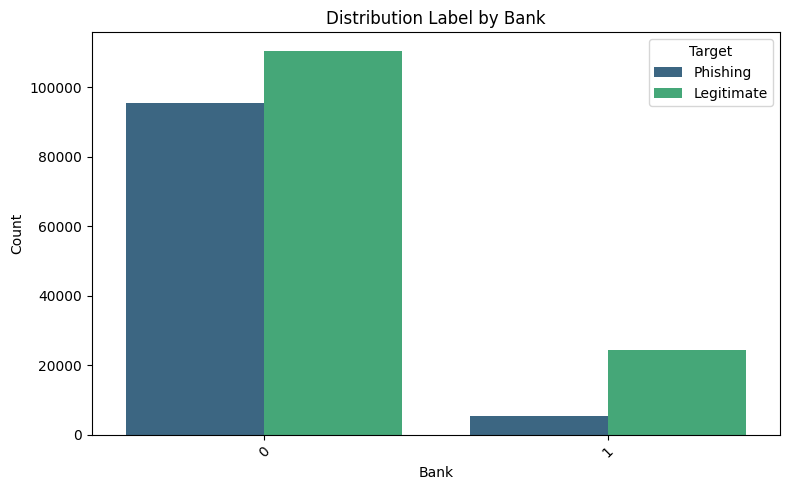

<Figure size 640x480 with 0 Axes>

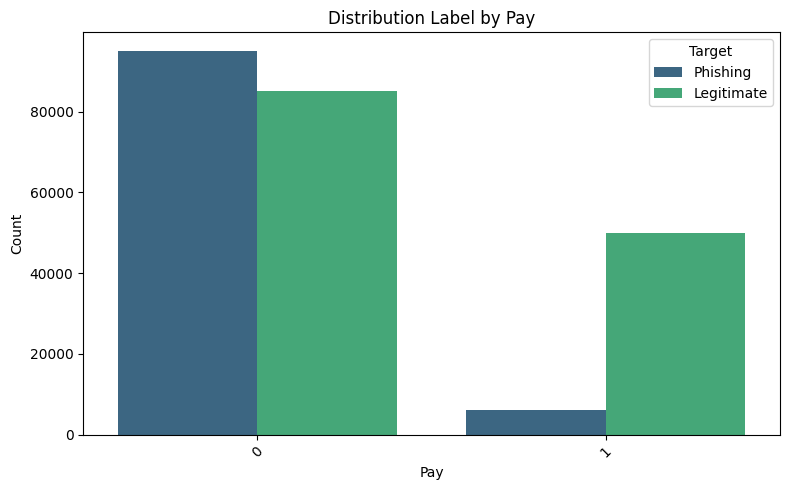

<Figure size 640x480 with 0 Axes>

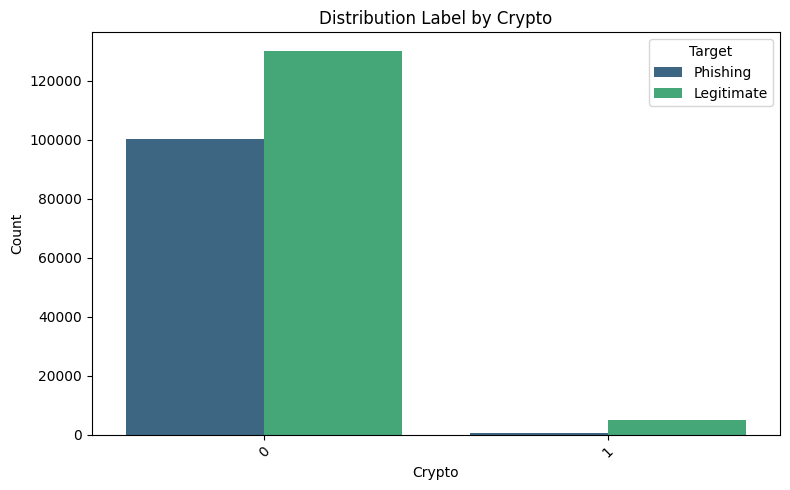

<Figure size 640x480 with 0 Axes>

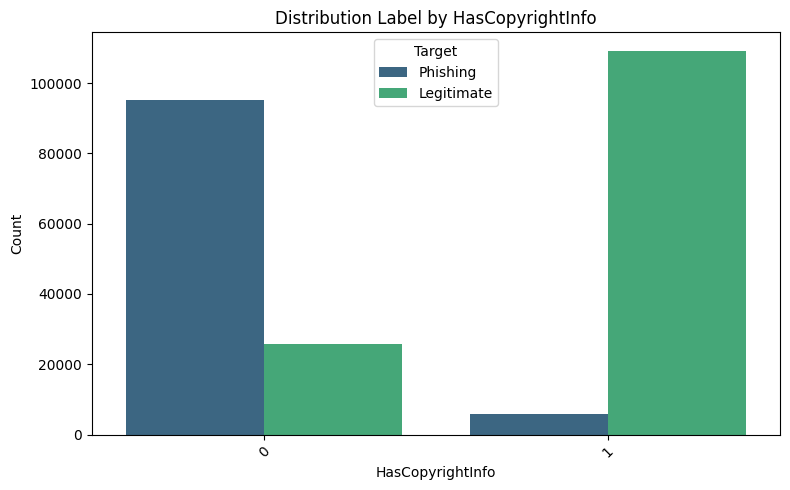

In [6]:
# Boxplot grouped by category
import seaborn as sns
for feature in categorical_features:
    plt.clf()
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=feature, hue='label', palette='viridis')
    plt.title(f'Distribution Label by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Target', labels=['Phishing', 'Legitimate'])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



In [7]:

# Feature Engineering
from collections import Counter
import math


df['DomainToURLLengthRatio'] = df['DomainLength'] / df['URLLength']

# Adding a feature for String Entropy -- measures amount of "randomness" in a URL string
def calc_entropy(url):
    if not url:
        return 0
    # count frequencies
    freqs = Counter(url)
    probabilities = [count / len(url) for count in freqs.values()]

    # Shannon entropy formula: https://en.wikipedia.org/wiki/Entropy_(information_theory)
    entropy = -sum(p * math.log2(p) for p in probabilities)
    return entropy
df['Entropy'] = df['URL'].apply(calc_entropy)



<Figure size 1000x600 with 0 Axes>

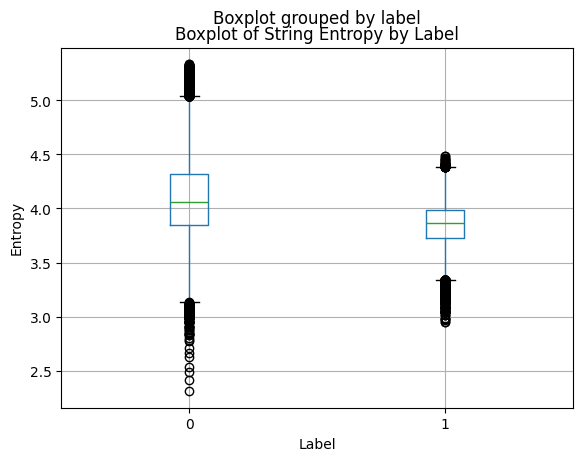

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box Plot
plt.figure(figsize=(10, 6))
df.boxplot(column="Entropy", by="label", grid=True)
plt.title("Boxplot of String Entropy by Label")
plt.xlabel("Label")
plt.ylabel("Entropy")
plt.show()



<Figure size 1000x600 with 0 Axes>

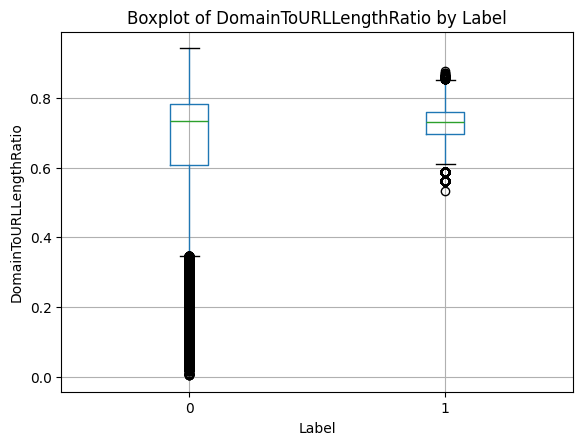

In [9]:
# Box Plot
plt.figure(figsize=(10, 6))
df.boxplot(column="DomainToURLLengthRatio", by="label", grid=True)
plt.title("Boxplot of DomainToURLLengthRatio by Label")
plt.suptitle("")
plt.xlabel("Label")
plt.ylabel("DomainToURLLengthRatio")
plt.show()

In [11]:
plt.figure(figsize=(10, 6))

sns.pairplot(df2.sample(frac=0.001), hue='label')

plt.suptitle('Pair Plot for Dataset')
plt.show()

<Figure size 1000x600 with 0 Axes>